In [1]:
import json

with open('/home/danis/Projects/AlphaCaption/AutoConceptBottleneck/autoconcept/outputs/2023-04-19/12-08-55/results.json') as f:
    results = json.load(f)

top_k = int(results["top_k"])
results = results["results"]

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def plot_instances(features):
    fig, axes = plt.subplots(3, top_k)
    fig.set_size_inches(10, 4)
    labels = ["lrg", "mdm", "sml"]
    for i, ax in enumerate(axes.flatten()):
        label = labels[i // top_k]
        image = plt.imread(features[label][i % top_k][0])
        label = float(features[label][i % top_k][1])
        ax.set_title(f"{label:.3f}")
        ax.imshow(image)
        ax.xaxis.set_ticks_position('none') 
        ax.yaxis.set_ticks_position('none') 
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    plt.show()

In [4]:
def visualize_concept(concept_id=0):
    print(f"Concept #{concept_id + 1}\n")
    print("Top-k tokens w.r.t. average attention score:")
    pair = results[concept_id]
    token_attn = [(t, a) for t, a in pair["concept"]]
    for idx, (t, a) in enumerate(token_attn):
        print(f"\t{idx + 1}. {t}: {a:.4f}", sep=" ")
    if pair["feature"]:
        print("\nTop-n images with largest absolute values of logits:")
        plot_instances(pair["feature"])
    print(120 * "-")

Concept #1

Top-k tokens w.r.t. average attention score:
	1. blank: 0.1290
	2. red: 0.1206
	3. up: 0.1183
	4. canvas: 0.1114
	5. angle: 0.1045
	6. blue: 0.1031
	7. round: 0.0940
	8. rotate: 0.0903
	9. position: 0.0798
	10. green: 0.0709
	11. shape: 0.0623
	12. this: 0.0603
	13. unrotate: 0.0603
	14. right: 0.0578
	15. white: 0.0574
	16. three: 0.0541
	17. bottom: 0.0479
	18. four: 0.0412
	19. is: 0.0375
	20. color: 0.0371
	21. has: 0.0345
	22. left: 0.0256
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


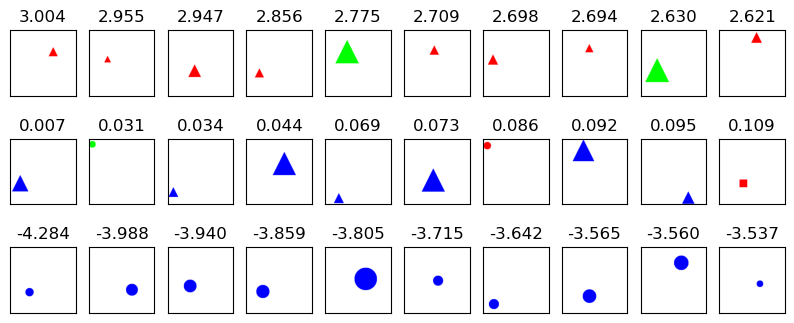

------------------------------------------------------------------------------------------------------------------------
Concept #2

Top-k tokens w.r.t. average attention score:
	1. canvas: 0.3263
	2. is: 0.2101
	3. green: 0.2073
	4. round: 0.1860
	5. bottom: 0.1267
	6. red: 0.1198
	7. blue: 0.1094
	8. blank: 0.0715
	9. rotate: 0.0534
	10. up: 0.0519
	11. unrotate: 0.0504
	12. this: 0.0465
	13. angle: 0.0432
	14. position: 0.0381
	15. four: 0.0192
	16. has: 0.0185
	17. right: 0.0154
	18. left: 0.0152
	19. three: 0.0109
	20. shape: 0.0076
	21. white: 0.0031
	22. color: 0.0014
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


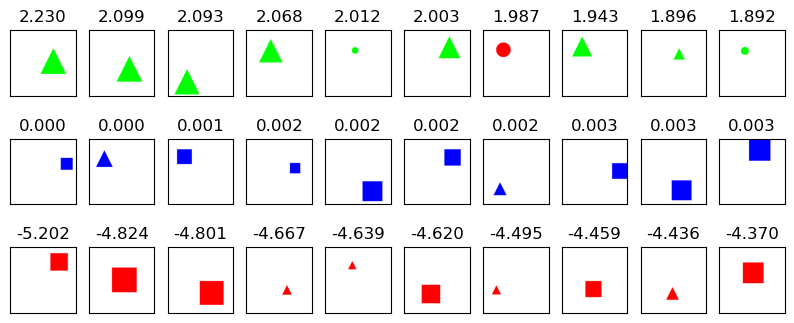

------------------------------------------------------------------------------------------------------------------------
Concept #3

Top-k tokens w.r.t. average attention score:
	1. color: 0.3713
	2. white: 0.1274
	3. shape: 0.1216
	4. right: 0.0952
	5. three: 0.0750
	6. blank: 0.0663
	7. has: 0.0651
	8. position: 0.0643
	9. up: 0.0635
	10. four: 0.0618
	11. angle: 0.0435
	12. this: 0.0290
	13. blue: 0.0289
	14. rotate: 0.0265
	15. left: 0.0248
	16. round: 0.0231
	17. green: 0.0231
	18. bottom: 0.0228
	19. unrotate: 0.0153
	20. red: 0.0130
	21. is: 0.0046
	22. canvas: 0.0042
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


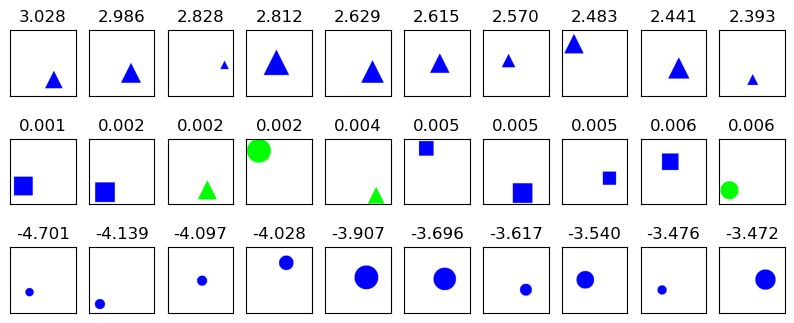

------------------------------------------------------------------------------------------------------------------------
Concept #4

Top-k tokens w.r.t. average attention score:
	1. left: 0.1617
	2. four: 0.1375
	3. has: 0.1277
	4. this: 0.1238
	5. three: 0.1188
	6. shape: 0.1019
	7. position: 0.0947
	8. right: 0.0880
	9. unrotate: 0.0846
	10. white: 0.0646
	11. bottom: 0.0633
	12. color: 0.0544
	13. rotate: 0.0445
	14. angle: 0.0435
	15. blue: 0.0366
	16. up: 0.0335
	17. is: 0.0290
	18. red: 0.0229
	19. green: 0.0208
	20. blank: 0.0167
	21. round: 0.0163
	22. canvas: 0.0074
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


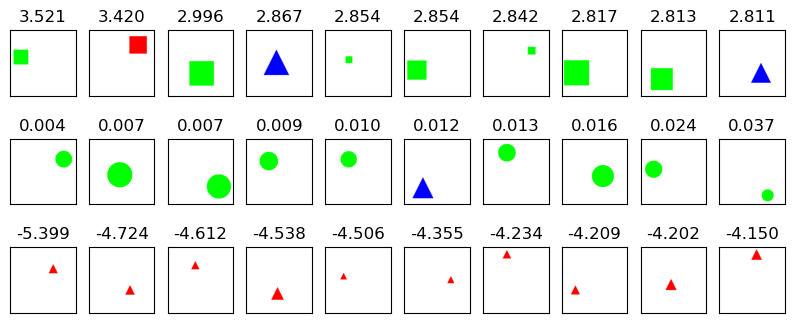

------------------------------------------------------------------------------------------------------------------------
Concept #5

Top-k tokens w.r.t. average attention score:
	1. round: 0.1639
	2. blue: 0.1574
	3. blank: 0.1340
	4. green: 0.1287
	5. red: 0.1106
	6. angle: 0.1090
	7. right: 0.0998
	8. up: 0.0996
	9. canvas: 0.0996
	10. has: 0.0954
	11. this: 0.0808
	12. bottom: 0.0786
	13. unrotate: 0.0770
	14. rotate: 0.0719
	15. position: 0.0482
	16. white: 0.0475
	17. is: 0.0448
	18. four: 0.0405
	19. left: 0.0337
	20. shape: 0.0244
	21. color: 0.0243
	22. three: 0.0202
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


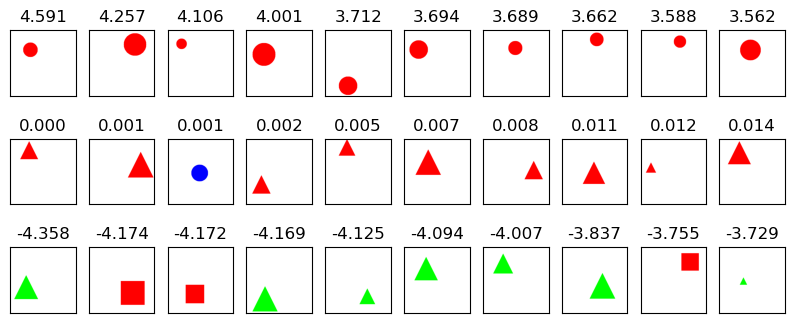

------------------------------------------------------------------------------------------------------------------------
Concept #6

Top-k tokens w.r.t. average attention score:
	1. canvas: 0.2516
	2. green: 0.2270
	3. round: 0.2125
	4. blank: 0.1980
	5. up: 0.1090
	6. blue: 0.1068
	7. red: 0.1004
	8. is: 0.0659
	9. bottom: 0.0646
	10. rotate: 0.0620
	11. angle: 0.0597
	12. position: 0.0367
	13. right: 0.0214
	14. shape: 0.0198
	15. this: 0.0191
	16. unrotate: 0.0170
	17. three: 0.0125
	18. four: 0.0123
	19. white: 0.0103
	20. color: 0.0083
	21. has: 0.0070
	22. left: 0.0037
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


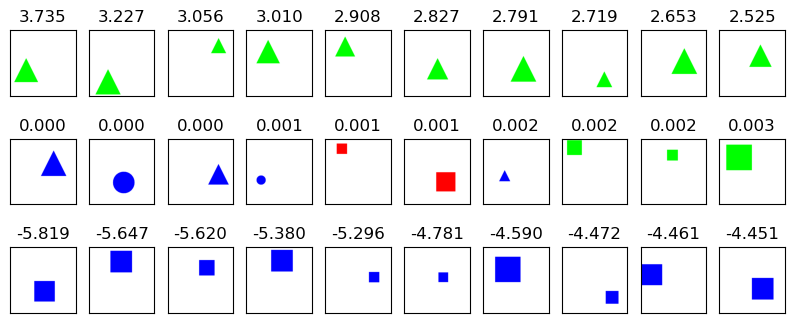

------------------------------------------------------------------------------------------------------------------------
Concept #7

Top-k tokens w.r.t. average attention score:
	1. unrotate: 0.1695
	2. left: 0.1578
	3. rotate: 0.1435
	4. red: 0.1153
	5. white: 0.1104
	6. three: 0.1093
	7. position: 0.1016
	8. is: 0.1014
	9. four: 0.0940
	10. angle: 0.0815
	11. shape: 0.0805
	12. this: 0.0779
	13. right: 0.0761
	14. bottom: 0.0761
	15. blue: 0.0602
	16. canvas: 0.0406
	17. up: 0.0378
	18. green: 0.0334
	19. has: 0.0291
	20. color: 0.0288
	21. blank: 0.0221
	22. round: 0.0158
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


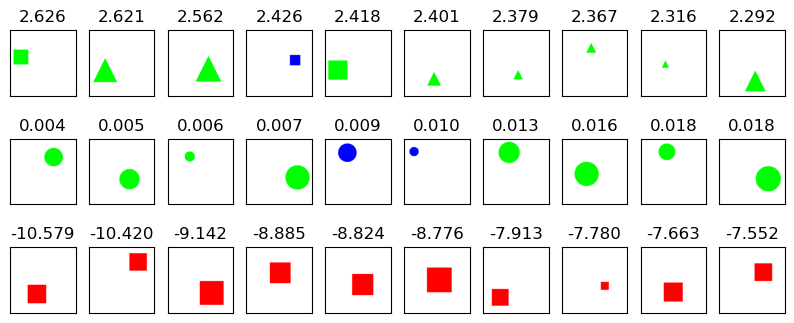

------------------------------------------------------------------------------------------------------------------------
Concept #8

Top-k tokens w.r.t. average attention score:
	1. has: 0.1271
	2. bottom: 0.1102
	3. round: 0.1056
	4. green: 0.0974
	5. this: 0.0836
	6. position: 0.0735
	7. four: 0.0729
	8. up: 0.0708
	9. blue: 0.0667
	10. right: 0.0618
	11. blank: 0.0599
	12. three: 0.0457
	13. left: 0.0456
	14. is: 0.0438
	15. shape: 0.0414
	16. angle: 0.0403
	17. unrotate: 0.0369
	18. rotate: 0.0310
	19. color: 0.0305
	20. canvas: 0.0252
	21. red: 0.0250
	22. white: 0.0171
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


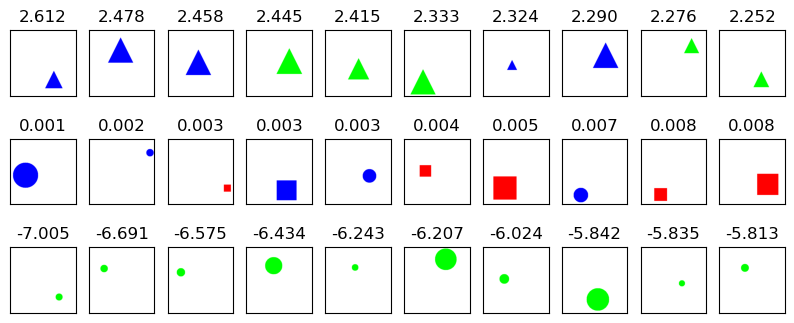

------------------------------------------------------------------------------------------------------------------------
Concept #9

Top-k tokens w.r.t. average attention score:
	1. is: 0.2467
	2. bottom: 0.2025
	3. rotate: 0.1249
	4. left: 0.1123
	5. red: 0.1006
	6. position: 0.0948
	7. unrotate: 0.0944
	8. green: 0.0929
	9. four: 0.0876
	10. three: 0.0645
	11. blue: 0.0619
	12. this: 0.0602
	13. right: 0.0562
	14. canvas: 0.0536
	15. angle: 0.0488
	16. shape: 0.0481
	17. white: 0.0467
	18. up: 0.0441
	19. round: 0.0322
	20. blank: 0.0238
	21. has: 0.0224
	22. color: 0.0169
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


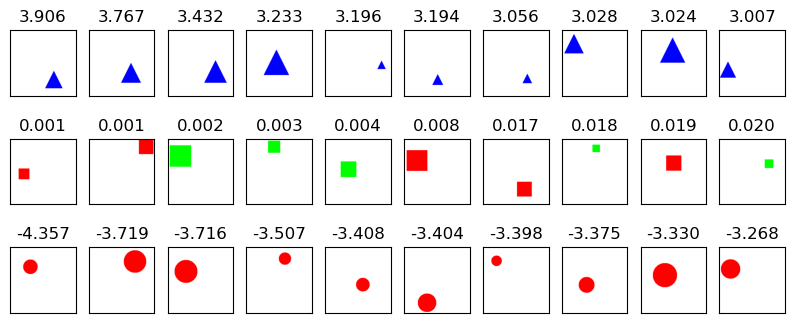

------------------------------------------------------------------------------------------------------------------------
Concept #10

Top-k tokens w.r.t. average attention score:
	1. has: 0.1616
	2. up: 0.1299
	3. color: 0.1265
	4. white: 0.1249
	5. right: 0.1206
	6. blank: 0.1179
	7. angle: 0.1100
	8. this: 0.1005
	9. shape: 0.0889
	10. blue: 0.0838
	11. round: 0.0596
	12. position: 0.0539
	13. four: 0.0525
	14. three: 0.0513
	15. unrotate: 0.0448
	16. rotate: 0.0432
	17. red: 0.0430
	18. left: 0.0281
	19. green: 0.0253
	20. canvas: 0.0227
	21. bottom: 0.0205
	22. is: 0.0043
	23. <pad>: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


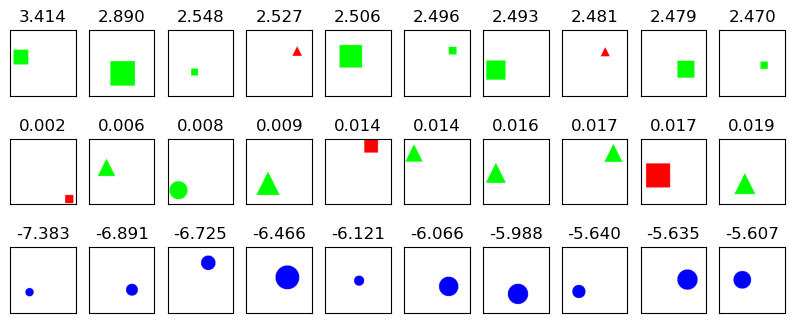

------------------------------------------------------------------------------------------------------------------------
Concept #11

Top-k tokens w.r.t. average attention score:
	1. shape: 0.1471
	2. three: 0.1215
	3. position: 0.1008
	4. four: 0.0970
	5. this: 0.0916
	6. rotate: 0.0847
	7. up: 0.0732
	8. bottom: 0.0731
	9. white: 0.0677
	10. angle: 0.0642
	11. left: 0.0618
	12. right: 0.0613
	13. unrotate: 0.0598
	14. blue: 0.0527
	15. red: 0.0488
	16. color: 0.0451
	17. green: 0.0395
	18. is: 0.0384
	19. has: 0.0372
	20. blank: 0.0330
	21. canvas: 0.0276
	22. round: 0.0249
	23. <pad>: 0.0000
	24. <unk>: nan
------------------------------------------------------------------------------------------------------------------------


In [5]:
for i in range(11):
    visualize_concept(i)